(array([18262., 18628., 18993., 19358., 19723., 20089., 20454.]),
 [Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025'),
  Text(20454.0, 0, '2026')])

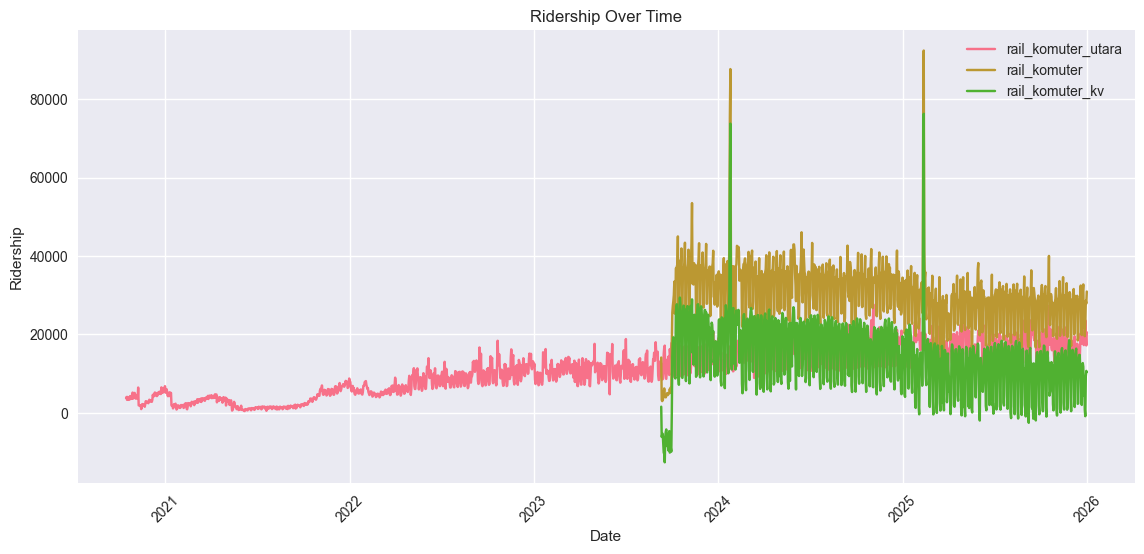

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots (with fallback)
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('default')
sns.set_palette("husl")

# Read the CSV file
file_path = r"C:\Users\USER\Desktop\DataVizz\komuterridership\ridership_headline.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

# Identify line columns (all numeric columns except date)
line_columns = [col for col in df.columns if col != 'date' and pd.api.types.is_numeric_dtype(df[col])]

# Create a single large figure with all plots
plt.figure(figsize=(30, 20))  # Increased size to 20x15 inches

# 1. Time Series Plot for all lines
plt.subplot(3, 2, 1)
for column in line_columns:
    plt.plot(df['date'], df[column], label=column)
plt.title('Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend()
plt.xticks(rotation=45)

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.,
        20454.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025'),
  Text(20454.0, 0, '2026')])

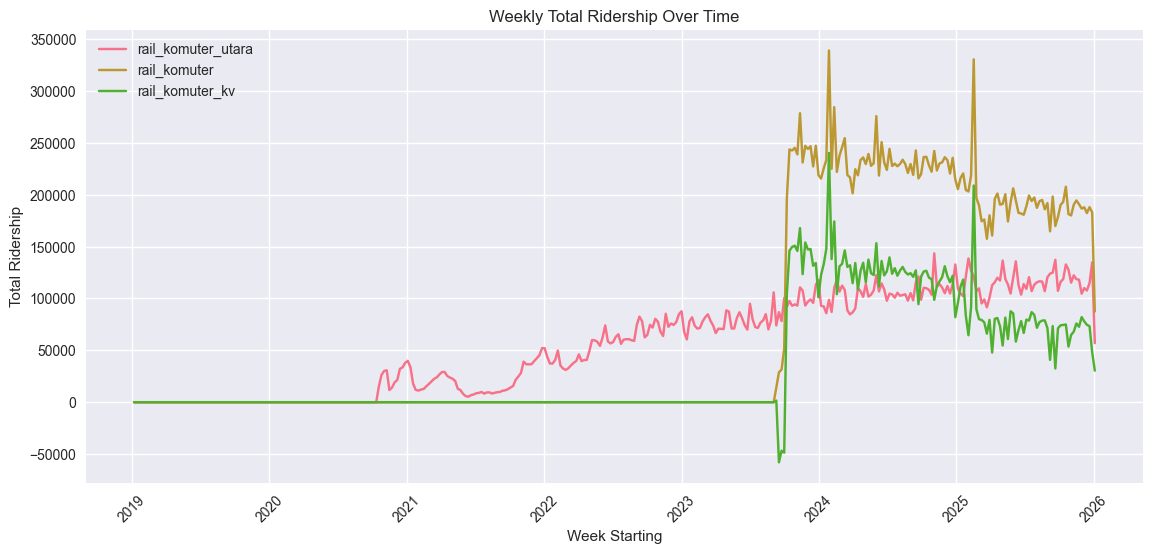

In [7]:
# Resample to weekly data, summing ridership for each line
df_weekly = df.set_index('date').resample('W').sum().reset_index()

# Create a single large figure with all plots
plt.figure(figsize=(30, 20))

# 1. Time Series Plot for all lines (weekly totals)
plt.subplot(3, 2, 1)
for column in line_columns:
    plt.plot(df_weekly['date'], df_weekly[column], label=column)
plt.title('Weekly Total Ridership Over Time')
plt.xlabel('Week Starting')
plt.ylabel('Total Ridership')
plt.legend()
plt.xticks(rotation=45)